#  <p style="color:Black;">1.Importing DS. </p>

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score, roc_curve, roc_auc_score
from sklearn import metrics
import tensorflow as tf
from sklearn.impute import KNNImputer

warnings.filterwarnings("ignore")

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fcdn-prod.medicalnewstoday.com%2Fcontent%2Fimages%2Farticles%2F323%2F323627%2Fdiabetes.jpg&imgrefurl=https%3A%2F%2Fwww.medicalnewstoday.com%2Farticles%2F323627&tbnid=8Uh9XWHpI-PPHM&vet=12ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ..i&docid=F90ufqoDOf6rXM&w=1100&h=734&q=diabetes&ved=2ahUKEwi3k7u7ppHwAhXnDLcAHYrgCNIQMygAegUIARDQAQ)

#  <p style="color:Black;">2. Reading The Dataset and Creating DataFrame. </p>

In [2]:
diabetes = pd.read_csv('./diabetes_prediction_dataset.csv')

#  <p style="color:Black;">3. Data Analysis </p>

**3.1 Examinning data**

In [3]:
diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
diabetes['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

**3.2 Number Of Rows and Columns In DataFrame**

In [5]:
print(f"Number of rows in dataframe are : {diabetes.shape[0]} \nNumber of columns in dataframe are : {diabetes.shape[1]} \n")

Number of rows in dataframe are : 100000 
Number of columns in dataframe are : 9 



**3.3 Examine DF**

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


> * 7 columns of type "int".
> * 2 columns of type "float"

**3.4 Checking Statistical info of data**

In [7]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**3.5 Checking The Duplicate Rows**

In [8]:
diabetes[diabetes.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


> **0** duplicate rows found in the dataframe.

**3.6 Inspect unique values in data**

In [9]:
diabetes.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

> * Highest number of unique values are in column bmi.

**3.7 Checking For The Null Values in DataFrame**

In [10]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

> **0** null values found

**3.8 Checking Class Distribution**

In [11]:
print("Number of samples for Outcome 0 are : ",len(diabetes[diabetes['diabetes']==0]))
print("Number of samples for Outcome 1 are : ",len(diabetes[diabetes['diabetes']==1]))


Number of samples for Outcome 0 are :  91500
Number of samples for Outcome 1 are :  8500


> Classes are **imbalanced**.This may end up in biased data


#  <p style="color:Blue;">4. Data Visualization</p>

In [12]:
# Add all column names to a list except for the target variable
columns=diabetes.columns
columns=list(columns)
columns.pop()
print("Column names except for the target column are :",columns)

#Graphs to be plotted with these colors
colours=['b','c','g','k','m','r','y','b']
print()
print('Colors for the graphs are :',colours)

Column names except for the target column are : ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']

Colors for the graphs are : ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']


In [13]:
## Identify categorical columns have same values for more than 80% of rows
## jey
#more_than_70_percent = (60/100)*pricing_data.count()[0]
more_than_80_percent = (80/100)*diabetes.count()[0]
col_in_cat = diabetes.select_dtypes(include='object')
same_val_col= []
count_val=[]
dict1={}
index=0
for col in col_in_cat:
    length = len(diabetes[col].value_counts())
    for j in range(0,length):
        if(diabetes[col].value_counts()[j] > more_than_80_percent):
            same_val_col.append(col)
            count_val.append(diabetes[col].value_counts()[j])
index = 0
for col in same_val_col:
    dict1[col]=count_val[index]
    index=index+1
dict1

{}

In [14]:
def mapGenderToNumeric(x):
    if(x == 'Male'):
        return 1 
    elif(x == 'Female'):
        return 2
    elif(x == 'Other'):
        return 2

In [15]:
col = ['gender']
for c in col:
    diabetes[c]=diabetes[c].apply(mapGenderToNumeric).astype(np.int64)

In [16]:
def mapsmokingHistoryToNumeric(x):
    if(x == 'ever'):
        return 4    
    elif(x == 'current'):
        return 3
    elif(x == 'former'):
        return 1
    elif(x == 'not current'):
        return 1
    elif(x == 'No Info' or x == 'never'):
        return 0 

In [17]:
col = ['smoking_history']
for c in col:
    diabetes[c]=diabetes[c].apply(mapsmokingHistoryToNumeric).astype(np.int64)

In [18]:
print(diabetes['smoking_history'])

0        0
1        0
2        0
3        3
4        3
        ..
99995    0
99996    0
99997    1
99998    0
99999    3
Name: smoking_history, Length: 100000, dtype: int64


**4.1 Distplot For Various Features**

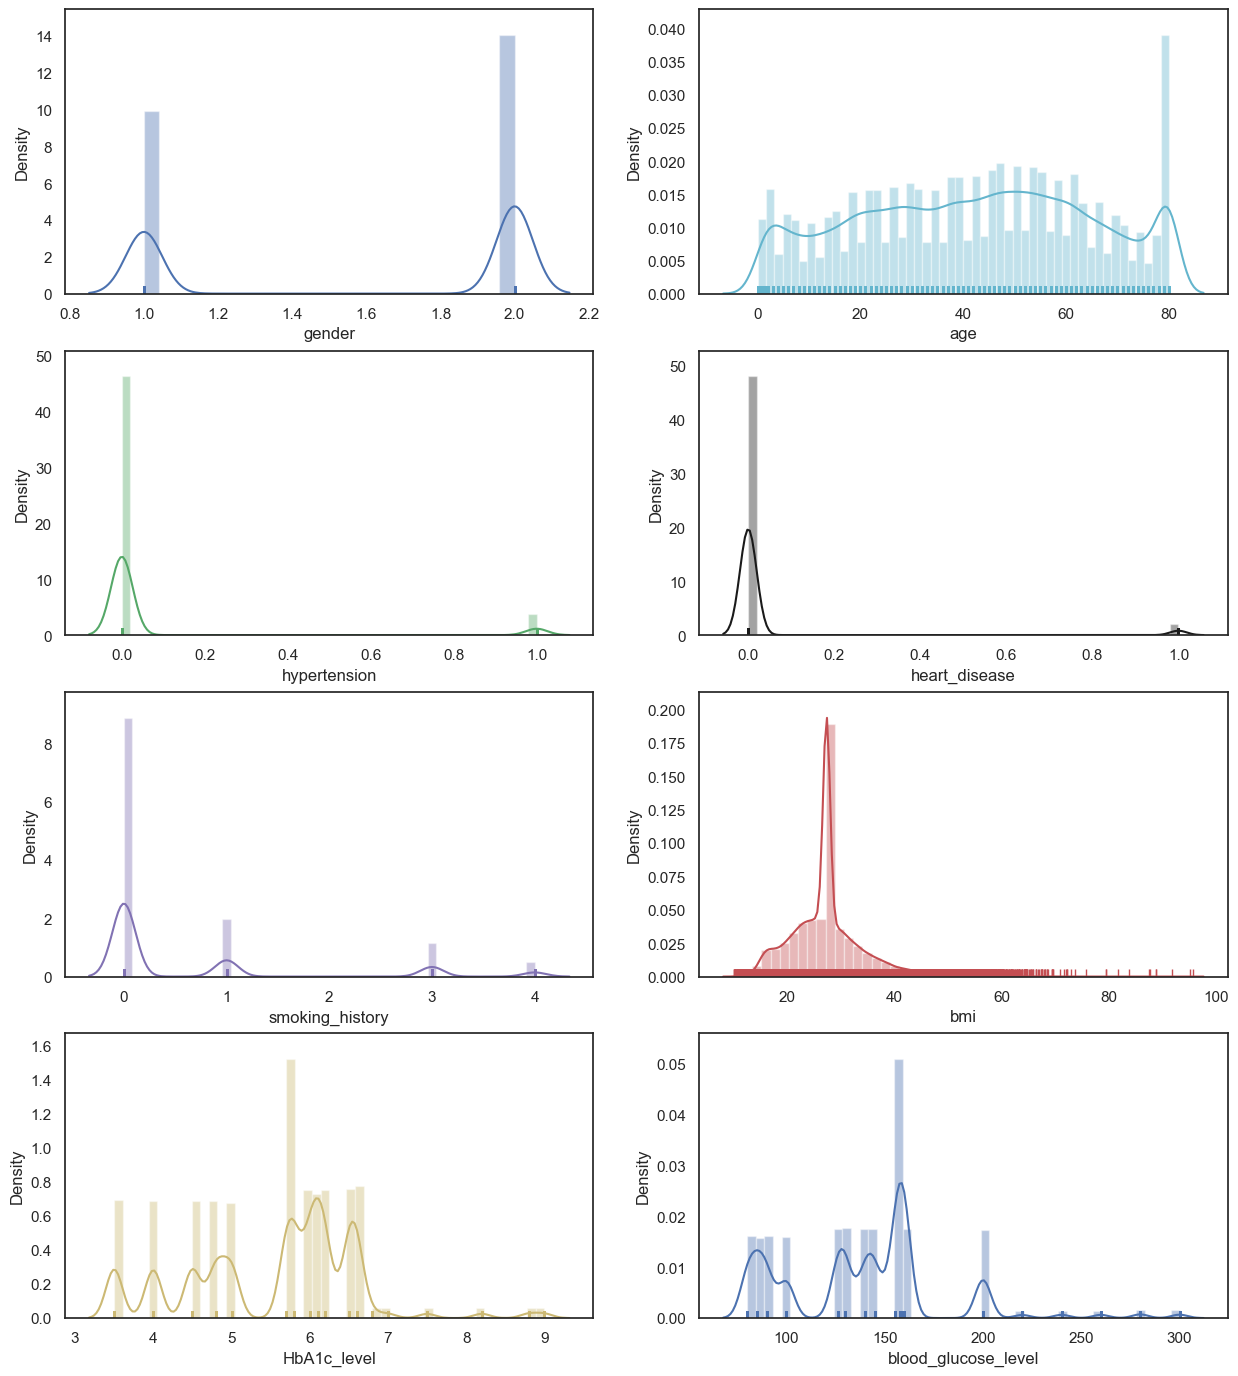

In [19]:
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(diabetes[columns[i]], hist=True, rug=True, color=colours[i])

None of the graphs here are following a normal distribution.

**4.2 ViolinPlot For Outcome Vs. Other Attributes**

In [21]:
sns.set(rc={'figure.figsize':(15,17)})
colors_list = ['#78C850', '#F08030']
j=1
sns.set_style(style='white')

for i in (columns):
    plt.subplot(4,2,j)
    sns.violinplot(x="diabetes", y=i,data=diabetes, kind="violin", split=True, height=4, aspect=.7,palette=colors_list)       
    sns.swarmplot(x='diabetes', y=i,data=diabetes, color="k", alpha=0.8)  
    j=j+1


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C514817560> (for post_execute):


KeyboardInterrupt: 

**4.3 ScatterPlot Of All Attributes Against Each Other**

In [ ]:
sns.set(rc={'figure.figsize':(20,150)})
j=1

sns.set_style(style='white')
for i in range(len(columns)):
    for k in range(i,len(columns)):
        try:
            if i==k:
                continue
            plt.subplot(18,2,j)
            sns.scatterplot(x=diabetes[columns[i]],y=diabetes[columns[k]],hue="diabetes",data=diabetes)
            j=j+1
        except:
            break

**4.4 Strip Plot Distribution Of Attributes Vs Outcome**

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
j=1
sns.set_style(style='white')
for i in range(len(columns)):
    plt.subplot(4,2,j)
    sns.stripplot(x='diabetes', y=columns[i] , data=diabetes,hue="diabetes")
    j=j+1   


**4.5 Plotting The Pair Plot**

In [ ]:
sns.set(rc={'figure.figsize':(30,250)})
sns.set_style(style='white')
sns.pairplot(diabetes, hue='diabetes')

**4.6 HeatMap**

In [ ]:
plt.figure(figsize=(6,6))
sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(diabetes.corr(), annot=True)

**4.7 Distribution Of Target Variable**

In [ ]:
plt.figure(figsize=(4,4))
sns.set_style(style='white')
sns.countplot(diabetes,x= 'diabetes')

### 4.8 KDEplot

In [ ]:
with sns.axes_style("white"):
    sns.set_palette("Set2")
    g2 = sns.jointplot(data=diabetes,x="Insulin", y="BMI",hue="diabetes")


#  <p style="color:Blue;">5. Data PreProcessing</p>

**5.1 Feature Engineering**

In [22]:
diabetes_with_preprocessing = diabetes

<Axes: >

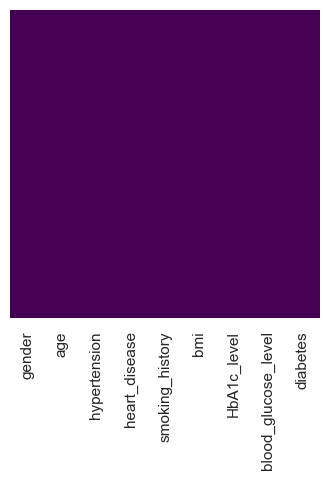

In [23]:
plt.figure(figsize=(4,4))

sns.heatmap(diabetes_with_preprocessing.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [24]:
#identify the numeric columns for skewness and kurtosis
num_cols = diabetes_with_preprocessing.select_dtypes(include=['float64','int64']).columns.tolist()
cols_to_analysed_skew = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].skew() < -2) | (diabetes_with_preprocessing[col].skew() > 2)):
        print("column",col,",skew:",diabetes_with_preprocessing[col].skew())
        cols_to_analysed_skew.append(col)
print(cols_to_analysed_skew) 

cols_to_analysed_kur = []
for col in num_cols:
    if((diabetes_with_preprocessing[col].kurtosis() < -7) | (diabetes_with_preprocessing[col].kurtosis() > 7)):
        print("column",col,",kurtosis:",diabetes_with_preprocessing[col].kurtosis())
        cols_to_analysed_kur.append(col)
print(cols_to_analysed_kur) 

col_to_analysed = list(set(cols_to_analysed_skew + cols_to_analysed_kur))
print(col_to_analysed)

column hypertension ,skew: 3.2312957890610265
column heart_disease ,skew: 4.733871943500769
column diabetes ,skew: 2.9762170270940076
['hypertension', 'heart_disease', 'diabetes']
column hypertension ,kurtosis: 8.441441304829652
column heart_disease ,kurtosis: 20.409951776099348
['hypertension', 'heart_disease']
['diabetes', 'hypertension', 'heart_disease']


Skew 4.733871943500769
Kurtosis 20.409951776099348


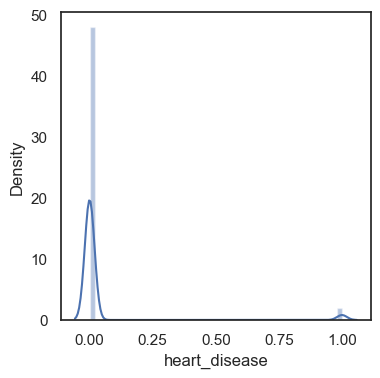

In [25]:
plt.figure(figsize=(4,4))
sns.distplot(diabetes_with_preprocessing['heart_disease'])
print("Skew", diabetes_with_preprocessing['heart_disease'].skew())
print("Kurtosis",diabetes_with_preprocessing['heart_disease'].kurtosis())

Skew 3.2312957890610265
Kurtosis 8.441441304829652


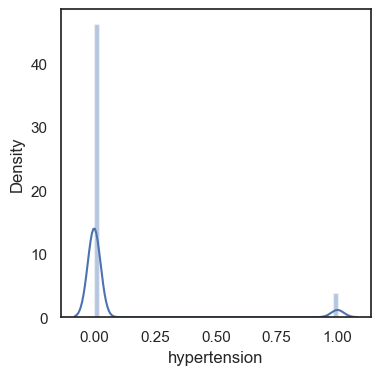

In [26]:
plt.figure(figsize=(4,4))
sns.distplot(diabetes_with_preprocessing['hypertension'])
print("Skew", diabetes_with_preprocessing['hypertension'].skew())
print("Kurtosis",diabetes_with_preprocessing['hypertension'].kurtosis())

In [27]:
diabetes_with_preprocessing['hypertension'] = np.where(diabetes_with_preprocessing['hypertension'] == 0, 0.000001, diabetes_with_preprocessing['hypertension'])
col_need_data_transformation = ['hypertension']
for col in col_need_data_transformation:
    diabetes_with_preprocessing[col] =  np.log(diabetes_with_preprocessing[col])

In [28]:
diabetes_with_preprocessing['heart_disease'] = np.where(diabetes_with_preprocessing['heart_disease'] == 0, 0.000001, diabetes_with_preprocessing['heart_disease'])
col_need_data_transformation = ['heart_disease']
for col in col_need_data_transformation:
    diabetes_with_preprocessing[col] =  np.log(diabetes_with_preprocessing[col])

Skew 4.733871943500763
Kurtosis 20.409951776099316


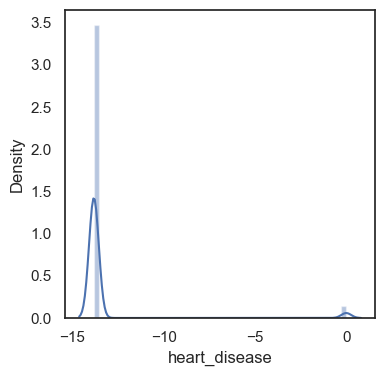

In [29]:
## after log transformation Insuling
#print(diabetes_with_preprocessing['Insulin'])
plt.figure(figsize=(4,4))
sns.distplot(diabetes_with_preprocessing['heart_disease'])
print("Skew", diabetes_with_preprocessing['heart_disease'].skew())
print("Kurtosis",diabetes_with_preprocessing['heart_disease'].kurtosis())

In [30]:
# Scaling those columns which have values greater than 1
scaleIt = MinMaxScaler()
columns_to_be_scaled = [c for c in diabetes.columns if diabetes[c].max() > 1]
print("The columns which are to be scaled are :",columns_to_be_scaled)

scaled_columns = scaleIt.fit_transform(diabetes_with_preprocessing[columns_to_be_scaled])
scaled_columns = pd.DataFrame(scaled_columns, columns=columns_to_be_scaled)
scaled_columns['diabetes'] = diabetes['diabetes'] 
#copying the scaled DataFrame to original DataFrame

diabetes_with_preprocessing=scaled_columns
diabetes_with_preprocessing

The columns which are to be scaled are : ['gender', 'age', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']


,gender,age,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,1.000000,0.00,0.177171,0.563636,0.272727,0
1,1.0,0.674675,0.00,0.202031,0.563636,0.000000,0
2,0.0,0.349349,0.00,0.202031,0.400000,0.354545,0
3,1.0,0.449449,0.75,0.156863,0.272727,0.340909,0
4,0.0,0.949950,0.75,0.118231,0.236364,0.340909,0
...,...,...,...,...,...,...,...
99995,1.0,1.000000,0.00,0.202031,0.490909,0.045455,0
99996,1.0,0.024024,0.00,0.085901,0.545455,0.090909,0
99997,0.0,0.824825,0.25,0.207983,0.400000,0.340909,0
99998,1.0,0.299299,0.00,0.296569,0.090909,0.090909,0


In [31]:
diabetes_with_preprocessing.shape

(100000, 7)

In [32]:
diabetes_with_preprocessing[diabetes_with_preprocessing.duplicated()].shape

(6597, 7)

In [33]:
diabetes_with_preprocessing = diabetes_with_preprocessing[~diabetes_with_preprocessing.duplicated()]

In [34]:
diabetes_with_preprocessing.shape

(93403, 7)

**5.2 Dividing The Data Into X And Y**

In [35]:
x=diabetes.iloc[:,:-1]
y=diabetes.iloc[:,-1:]
x.head(5),y.head(5)

(   gender   age  hypertension  heart_disease  smoking_history    bmi  \
 0       2  80.0    -13.815511       0.000000                0  25.19   
 1       2  54.0    -13.815511     -13.815511                0  27.32   
 2       1  28.0    -13.815511     -13.815511                0  27.32   
 3       2  36.0    -13.815511     -13.815511                3  23.45   
 4       1  76.0      0.000000       0.000000                3  20.14   
 
    HbA1c_level  blood_glucose_level  
 0          6.6                  140  
 1          6.6                   80  
 2          5.7                  158  
 3          5.0                  155  
 4          4.8                  155  ,
    diabetes
 0         0
 1         0
 2         0
 3         0
 4         0)

In [36]:
x_with_preprocessing=diabetes_with_preprocessing.iloc[:,:-1]
y_with_preprocessing=diabetes_with_preprocessing.iloc[:,-1:]
x_with_preprocessing.head(5),y_with_preprocessing.head(5)

(   gender       age  smoking_history       bmi  HbA1c_level  \
 0     1.0  1.000000             0.00  0.177171     0.563636   
 1     1.0  0.674675             0.00  0.202031     0.563636   
 2     0.0  0.349349             0.00  0.202031     0.400000   
 3     1.0  0.449449             0.75  0.156863     0.272727   
 4     0.0  0.949950             0.75  0.118231     0.236364   
 
    blood_glucose_level  
 0             0.272727  
 1             0.000000  
 2             0.354545  
 3             0.340909  
 4             0.340909  ,
    diabetes
 0         0
 1         0
 2         0
 3         0
 4         0)

**5.3 Train Test Split**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [38]:
print("Percentage of Positive Values in training data before Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train.shape)


smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

print('Shape of x after applying SMOTE : ', x_train.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")


Percentage of Positive Values in training data before Smote : 8.49 %
Percentage of Negative Values in training data before Smote : 91.51 %

Shape of x before applying SMOTE : (80000, 8)
Shape of x after applying SMOTE :  (146416, 8)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


In [39]:
x_train_with_pre, x_test_with_pre, y_train_with_pre, y_test_with_pre = train_test_split(x_with_preprocessing,y_with_preprocessing , test_size = 0.2, random_state = 42)

**5.4 Using SMOTE To Handle Class Imbalance**


In [40]:
print("Percentage of Positive Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of x before applying SMOTE :', x_train_with_pre.shape)


smote = SMOTE()
x_train_with_pre,y_train_with_pre = smote.fit_resample(x_train_with_pre,y_train_with_pre)

print('Shape of x after applying SMOTE : ', x_train_with_pre.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[1]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train_with_pre.value_counts(normalize=True)[0]/(y_train_with_pre.value_counts(normalize=True)[0]+y_train_with_pre.value_counts(normalize=True)[1])*100,"%")


Percentage of Positive Values in training data before Smote : 15.346444917750487 %
Percentage of Negative Values in training data before Smote : 153.96066524674853 %

Shape of x before applying SMOTE : (74722, 6)
Shape of x after applying SMOTE :  (135898, 6)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


In [42]:
accuracy_metrics = []
precision_metrics =[]
recall_metrics = []
roc_auc_metrics= []

#  <p style="color:Blue;">6. Building The Models</p>

**6.1 Logistic Regression**

**6.1.1 Logistic Regression without preprocessing**

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
print("Precision score for Logistic Regression is :",precision_score(y_test, predicted,)*100, "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
print()
print("Recall score for Logistic Regression is :",recall_score(y_test, predicted,)*100, "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")
#print(accuracy_metrics)

Confusion Matrix : 
 [[16271  2021]
 [  291  1417]]

The accuracy of Logistic Regression is :  88.44 %
Precision score for Logistic Regression is : 41.21582315299593 %

Recall score for Logistic Regression is : 82.96252927400468 %


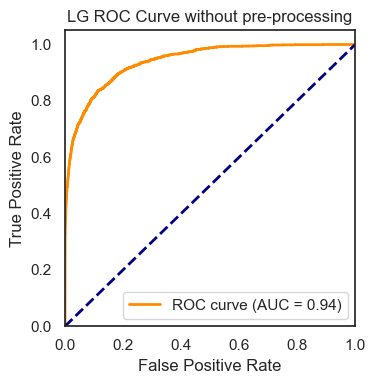

In [44]:
predictions = model.predict(x_test)
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve without pre-processing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.1.2 Logistic Regression with preprocessing**

In [45]:
model_with_pre = LogisticRegression()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted=model_with_pre.predict(x_test_with_pre)
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Logistic Regression is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Logistic Regression is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[15066  1958]
 [  218  1439]]
The accuracy of Logistic Regression is :  88.35180129543386 %
Precision score for Logistic Regression is : 42.360906682366796 %
Recall score for Logistic Regression is : 86.84369342184671 %


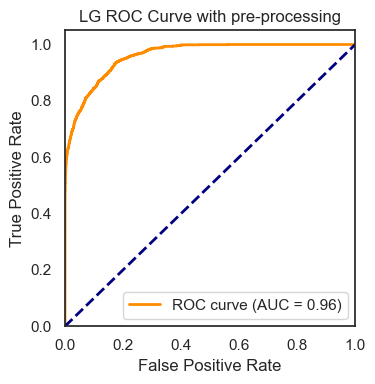

In [46]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LG ROC Curve with pre-processing')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.2 Gaussian Naive Bayes**


**6.2.1 Gaussian Naive Bayes without preprocessing**


In [47]:
model = GaussianNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)  
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")


Confusion Matrix : 
 [[16589  1703]
 [  398  1310]]
The accuracy of Gaussian Naive Bayes is :  89.495 %
Precision score for Gaussian Naive Bayes is : 43.47826086956522 %
Recall score for Gaussian Naive Bayes is : 76.69789227166277 %


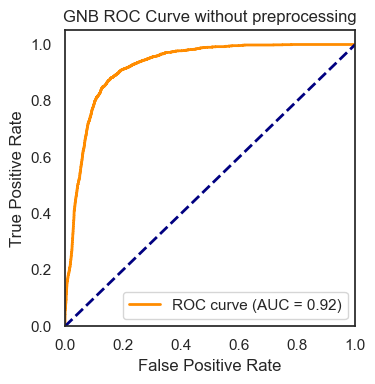

In [48]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.2.2 Gaussian Naive Bayes with preprocessing**


In [49]:
model_with_pre = GaussianNB()
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model_with_pre.predict(x_test_with_pre)
  
conf_with_pre = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf_with_pre)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print("Recall score for Gaussian Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[15144  1880]
 [  271  1386]]
The accuracy of Gaussian Naive Bayes is :  88.48562710775654 %
Precision score for Gaussian Naive Bayes is : 42.43723208818126 %
Recall score for Gaussian Naive Bayes is : 83.6451418225709 %


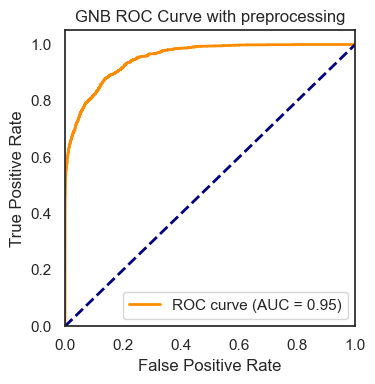

In [50]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GNB ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3 Bernoulli Naive Bayes**


**6.3.1 Bernoulli Naive Bayes without preprocessing**


In [51]:
model = BernoulliNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[13196  5096]
 [  983   725]]

The accuracy of Bernoulli Naive Bayes is :  69.60499999999999 %

Precision score for Bernoulli Naive Bayes is : 12.454904655557463 %

Recall score for Bernoulli Naive Bayes is : 42.44730679156909 %


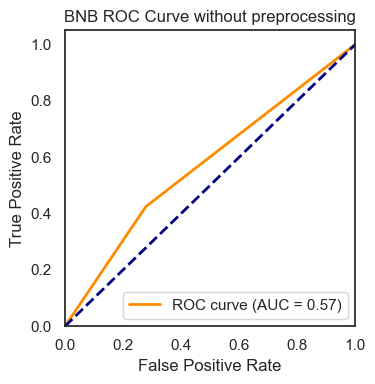

In [52]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.3.2 Bernoulli Naive Bayes with preprocessing**


In [53]:
model = BernoulliNB()
model.fit(x_train_with_pre, y_train_with_pre)
  
predicted = model.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for Bernoulli Naive Bayes is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[8719 8305]
 [ 529 1128]]

The accuracy of Bernoulli Naive Bayes is :  52.71131095765751 %

Precision score for Bernoulli Naive Bayes is : 11.958019718011236 %

Recall score for Bernoulli Naive Bayes is : 68.07483403741702 %


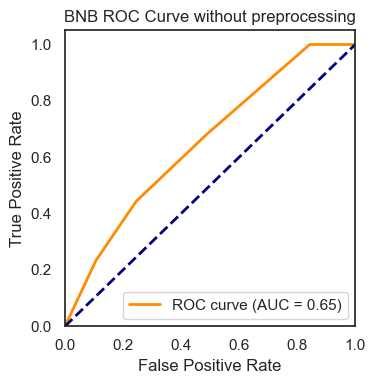

In [54]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('BNB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.4 Support Vector Machine**


**6.4.1 Support Vector Machine without preprocessing**


In [55]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print ("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print("Precision score for SVM is :",precision_score(y_test, predicted,)*100, "%")
print("Recall score for SVM is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[16237  2055]
 [  166  1542]]
The accuracy of SVM is :  88.895 %
Precision score for SVM is : 42.86905754795663 %
Recall score for SVM is : 90.28103044496487 %


In [56]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test, predicted))


area under curve (auc):  0.8952330551331996


**6.4.2 Support Vector Machine with preprocessing**


In [57]:
model = SVC()
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)
print()
print ("The accuracy of SVM is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for SVM is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[14827  2197]
 [  136  1521]]

The accuracy of SVM is :  87.51137519404743 %

Precision score for SVM is : 40.909090909090914 %

Recall score for SVM is : 91.79239589619796 %


In [58]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))
roc_auc_metrics.append( metrics.roc_auc_score(y_test_with_pre, predicted))

area under curve (auc):  0.8944354287291102


**6.5 K Nearest Neighbours**

**6.5.1 K Nearest Neighbours without preprocessing**

In [59]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[17200  1092]
 [  554  1154]]

The accuracy of KNN is :  91.77 %

Precision score for KNN is : 51.380231522707035 %

Recall score for KNN is : 67.56440281030444 %


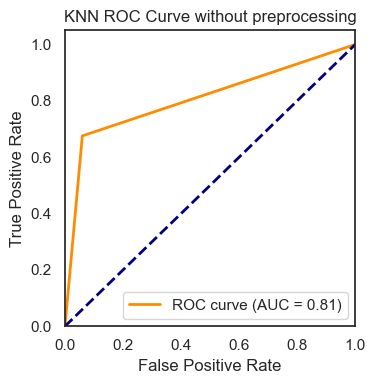

In [60]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.5.2 K Nearest Neighbours with preprocessing**

In [61]:
model_with_pre = KNeighborsClassifier(n_neighbors = 1)  
model_with_pre.fit(x_train_with_pre, y_train_with_pre)
predicted = model_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of KNN is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for KNN is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[16080   944]
 [  439  1218]]

The accuracy of KNN is :  92.5967560623093 %

Precision score for KNN is : 56.33672525439408 %

Recall score for KNN is : 73.50633675316838 %


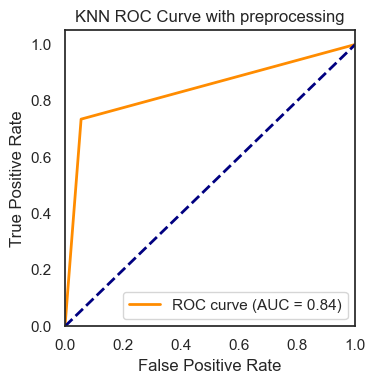

In [62]:
predictions_prob = model_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6 X Gradient Boosting**

**6.6.1 X Gradient Boosting without preprocessing**

In [63]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)

conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[18088   204]
 [  463  1245]]

The accuracy of XGBoost is :  96.665 %

Precision score for XGBoost is : 85.92132505175984 %

Recall score for XGBoost is : 72.89227166276346 %


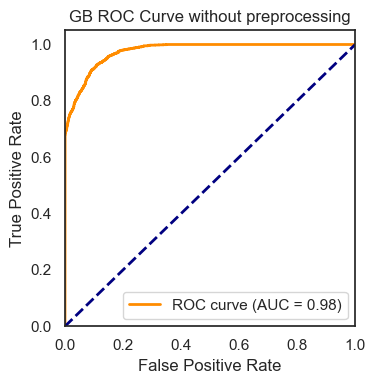

In [64]:
predictions_prob = model.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, predicted)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

**6.6.1 X Gradient Boosting with preprocessing**

In [65]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train_with_pre, y_train_with_pre)
predicted = model.predict(x_test_with_pre)

conf = confusion_matrix(y_test_with_pre, predicted)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of XGBoost is : ", accuracy_score(y_test_with_pre, predicted)*100, "%")
print()
print("Precision score for XGBoost is :",precision_score(y_test_with_pre, predicted,)*100, "%")
print()
print("Recall score for XGBoost is :",recall_score(y_test_with_pre, predicted,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[16837   187]
 [  486  1171]]

The accuracy of XGBoost is :  96.39740913227344 %

Precision score for XGBoost is : 86.22974963181149 %

Recall score for XGBoost is : 70.66988533494268 %


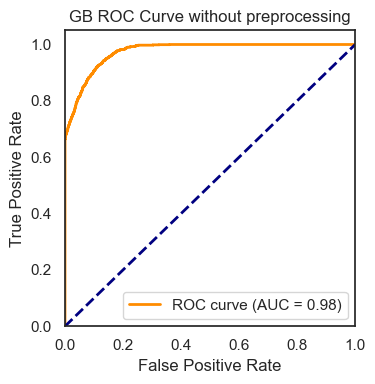

In [66]:
predictions_prob = model.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GB ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [67]:
print("area under curve (auc): ", metrics.roc_auc_score(y_test_with_pre, predicted))

area under curve (auc):  0.8478571804341118


In [68]:
#Fitting The Random Forest Classifier model to the Traning Set
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF.fit(x_train, y_train)
RF_y_pred = RF.predict(x_test)
conf = confusion_matrix(y_test, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, RF_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, RF_y_pred,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, RF_y_pred,)*100,2)) + "%")

Confusion Matrix : 
 [[17847   445]
 [  441  1267]]

The accuracy of RF is :  95.57 %

Precision score for RF is : 74.0070093457944 %

Recall score for RF is : 74.18032786885246 %


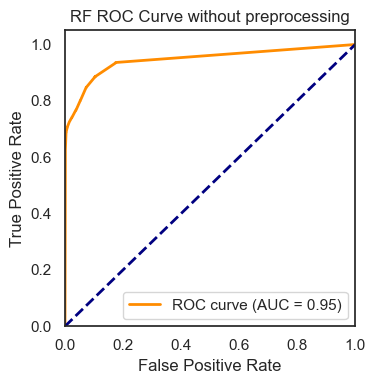

In [69]:
predictions_prob = RF.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, RF_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [70]:
RF_with_pre = RandomForestClassifier(n_estimators = 10,criterion = 'entropy',random_state = 0)
RF_with_pre.fit(x_train_with_pre, y_train_with_pre)
RF_y_pred = RF_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, RF_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of RF is : ", accuracy_score(y_test_with_pre, RF_y_pred)*100, "%")
print()
print("Precision score for RF is :",precision_score(y_test_with_pre, RF_y_pred,)*100, "%")
print()
print("Recall score for RF is :",recall_score(y_test_with_pre, RF_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, predicted)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, predicted,)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, predicted,)*100,2)) + "%")

Confusion Matrix : 
 [[16671   353]
 [  461  1196]]

The accuracy of RF is :  95.64263155077352 %

Precision score for RF is : 77.21110393802452 %

Recall score for RF is : 72.17863608931805 %


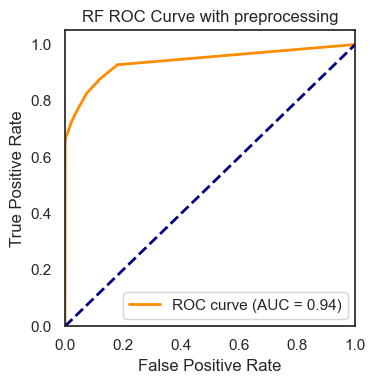

In [71]:
predictions_prob = RF_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, predicted)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [72]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
DT_y_pred = DT.predict(x_test)
conf = confusion_matrix(y_test, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test, DT_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test, DT_y_pred)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test, DT_y_pred)*100,2)) + "%")

Confusion Matrix : 
 [[17737   555]
 [  437  1271]]

The accuracy of DT is :  95.04 %

Precision score for DT is : 69.60569550930997 %

Recall score for DT is : 74.41451990632318 %


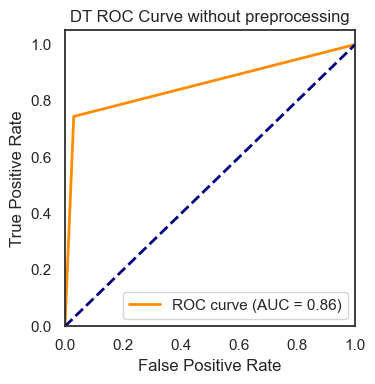

In [73]:
predictions_prob = DT.predict_proba(x_test)[:, 1]
f1 = f1_score(y_test, DT_y_pred)
fpr, tpr, thresholds = roc_curve(y_test, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve without preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [74]:
#Fitting The Decision Tree Classifier model to the Traning Set
from sklearn.tree import DecisionTreeClassifier
DT_with_pre = DecisionTreeClassifier()
DT_with_pre.fit(x_train_with_pre,y_train_with_pre)
DT_y_pred = DT_with_pre.predict(x_test_with_pre)
conf = confusion_matrix(y_test_with_pre, DT_y_pred)
print ("Confusion Matrix : \n", conf)

print()
print ("The accuracy of DT is : ", accuracy_score(y_test_with_pre, DT_y_pred)*100, "%")
print()
print("Precision score for DT is :",precision_score(y_test_with_pre, DT_y_pred,)*100, "%")
print()
print("Recall score for DT is :",recall_score(y_test_with_pre, DT_y_pred,)*100, "%")
accuracy_metrics.append(str(round(accuracy_score(y_test_with_pre, DT_y_pred)*100,2)) + "%")
precision_metrics.append(str(round(precision_score(y_test_with_pre, DT_y_pred)*100,2)) + "%")
recall_metrics.append(str(round(recall_score(y_test_with_pre, DT_y_pred,)*100,2)) + "%")

Confusion Matrix : 
 [[16353   671]
 [  430  1227]]

The accuracy of DT is :  94.10631122530914 %

Precision score for DT is : 64.64699683877765 %

Recall score for DT is : 74.04948702474351 %


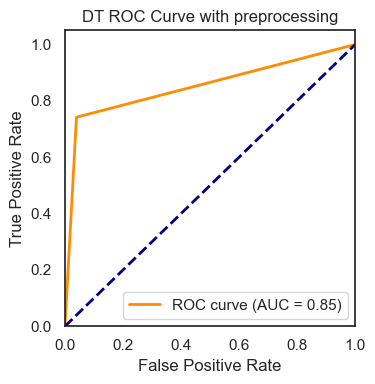

In [75]:
predictions_prob = DT_with_pre.predict_proba(x_test_with_pre)[:, 1]
f1 = f1_score(y_test_with_pre, DT_y_pred)
fpr, tpr, thresholds = roc_curve(y_test_with_pre, predictions_prob)
plt.figure(figsize=(7,4))
roc_auc = roc_auc_score(y_test_with_pre, predictions_prob)
# Plot ROC Curve
plt.subplot(122)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DT ROC Curve with preprocessing')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
roc_auc_metrics.append(roc_auc)

In [76]:
sum_table = {'ML Algorithm': ['LR without PreProcessing','LR with PreProcessing','GNB without PreProcessing','GNB with PreProcessing',
                       'BNB without PreProcessing','BNB with PreProcessing','SVM without preprecessing','SVM with preprocessing',
                            'KNN without preproccessing','KNN with preprocessing','GB without preprocessing','GB with preprocessing',
                            'RF without preprocessing','RF with preprocessing','DT without preprocessing','DT with preprocessing'], 
        'Accuracy': accuracy_metrics
        }
accuracy_sum_metric = pd.DataFrame(sum_table ,columns = ['ML Algorithm', 'Accuracy'] )
pre_sum_metric = pd.Series(precision_metrics, name = 'Precision') 
recall_sum_metric = pd.Series(recall_metrics, name = 'Recall')
roc_sum_metric = pd.Series(roc_auc_metrics, name = 'ROC AUC Score')

final_metric = pd.concat([accuracy_sum_metric,pre_sum_metric, recall_sum_metric, roc_sum_metric], axis = 1)

final_metric

,ML Algorithm,Accuracy,Precision,Recall,ROC AUC Score
0,LR without PreProcessing,88.44%,41.22%,82.96%,0.940668
1,LR with PreProcessing,88.35%,42.36%,86.84%,0.960323
2,GNB without PreProcessing,89.5%,43.48%,76.7%,0.923757
3,GNB with PreProcessing,88.49%,42.44%,83.65%,0.951788
4,BNB without PreProcessing,69.6%,12.45%,42.45%,0.572941
5,BNB with PreProcessing,52.71%,11.96%,68.07%,0.651114
6,SVM without preprecessing,88.89%,42.87%,90.28%,0.895233
7,SVM with preprocessing,87.51%,40.91%,91.79%,0.894435
8,KNN without preproccessing,91.77%,51.38%,67.56%,0.807973
9,KNN with preprocessing,92.6%,56.34%,73.51%,0.839806


#  <p style="color:Blue;">7. Conclusion</p>
1. Comparisions made for 6 algorithms with preprocessing vs without preprocessing and found metrics were improving for with processing 
2. Gaussian Naive bayes is performing the best in context of precision and recall where it is identifying 115 cases correct among total 154 predictions